https://leetcode.com/problems/task-scheduler/description/    
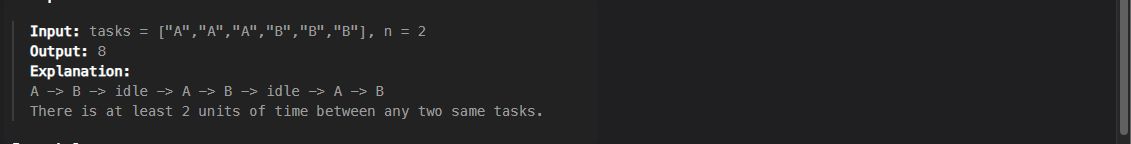

Shedule tasks, such that similar task have an interval of n between them=>    
 => every window of size n+1 should have unique char including the idle char
 => the greed is first doing the activities with the highest frequency

Return the minimum number of CPU intervals required to complete all tasks

explanation:   
    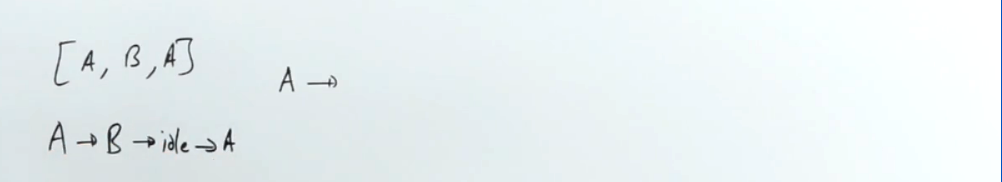

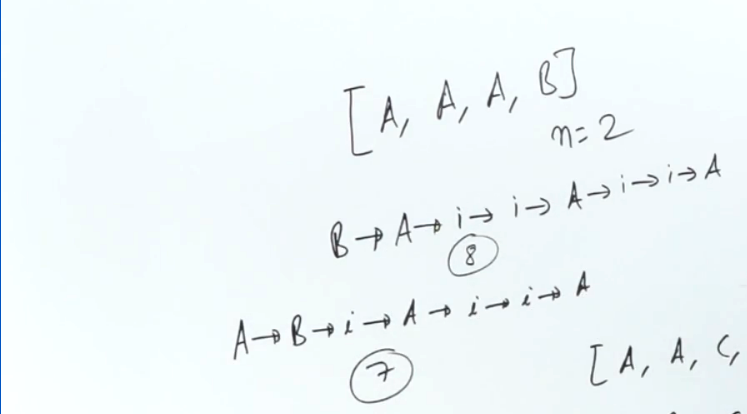

In [ ]:
    int leastInterval(vector<char>& v, int n) {
    unordered_map<char,int> cnt;
    for(char c:v){
        cnt[c]++;
    } 
    priority_queue<int> pq;
    for(auto p:cnt){
        pq.push(p.second);
    } 
    //our first pq with the frequencies is ready

    int req_len=n+1;
    int ans=0;
    while(!pq.empty()){
        //VERY BEAUTIFULL TECHNIQUE IS IMPLEMENTED BY USING THIS ARRAY
        vector<int> tmp;
        int curr_len=0;
        while(curr_len!=req_len){
            
            if(pq.empty()){
                //the current itiration is finished

                if(tmp.size()){
                // pad the current interval with nulls
                // before starting the next iteration
                // the remaining frequnecies are stored in tmp
                    ans+=(req_len-curr_len); 
                } 

                break;
            }
            int x=pq.top();
            pq.pop();
            if(x-1>0) tmp.push_back(x-1);
            ans++; 
            curr_len++;
        }
        for(int y:tmp){
            pq.push(y);
        } 
    }
    return ans;
}

yashesh solution   
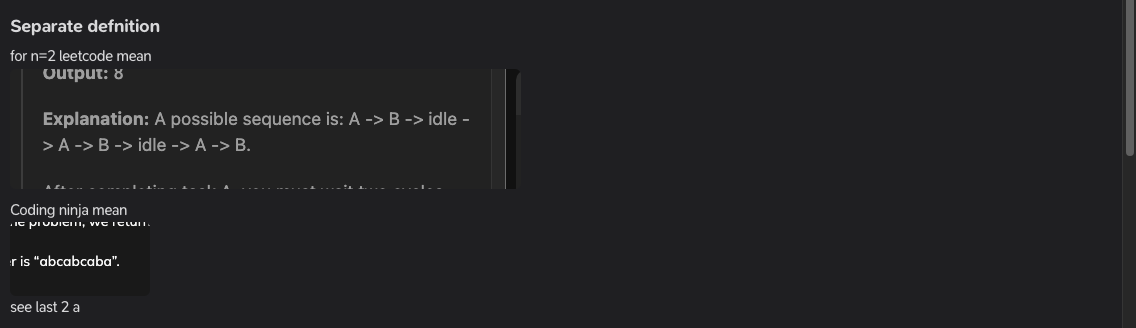    
https://www.naukri.com/code360/problems/ninja-and-rearrange-string_1461424    

In [ ]:
#include <bits/stdc++.h> 
bool rearrangeString(string &s, int n){
        n--;
        // vector<int> cnt(26,0);
        // for(char &c:s) cnt[c-'a']++;
        // priority_queue<int> pq;
        // for(int &x:cnt) if(x) pq.push(x);
        // int ans=0;
        // while(!pq.empty()){
        //     int interval=n+1;
        //     vector<int> temp;
        //     while(interval--){
        //         if(pq.empty()){
        //             if(temp.size()) ans+=(interval+1);
        //             //so actually decreased interval
        //             //one more time while entering this loop
        //             //which should not happen
        //             break;
        //         }
        //         int x=pq.top();
        //         pq.pop();
        //         if(x-1>0) temp.push_back(x-1);
        //         ans++; 
        //     }
        //     for(int &y:temp) pq.push(y);
        // }
        return ans==s.size();
}


In [ ]:
bool rearrangeString(string &s, int d) {
	if(d==0) return 1;
    unordered_map<char, int> mp;
	int n=s.size();
	int maxx = 0;
    int maxCnt = 0;

    //yashesh experience of doing it in a single loop
	for(char c: s){
        mp[c]++;
		if(mp[c]>maxx){
			maxx = mp[c];
			maxCnt = 1;
		}
		else if(mp[c]==maxx){
            maxCnt++;
        }	
	}
	return maxCnt+d*(maxx-1)<=n;
}

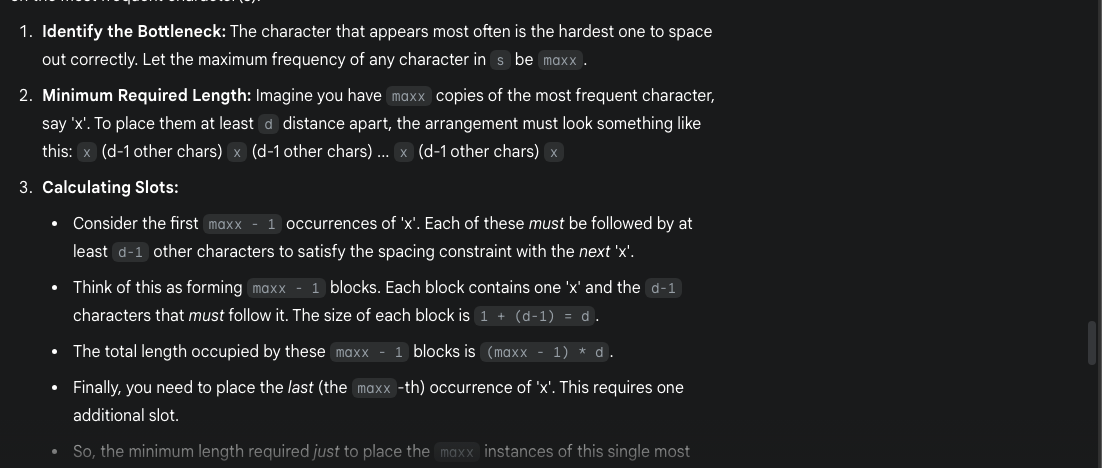

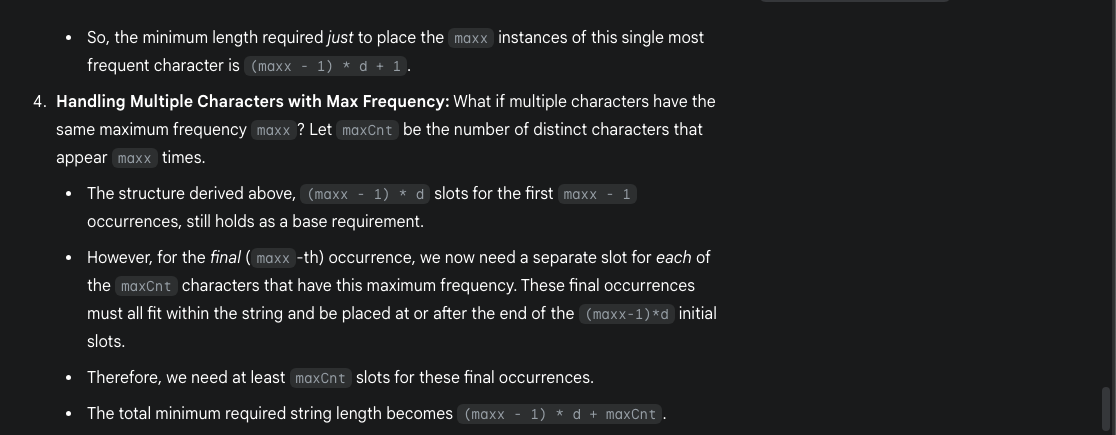

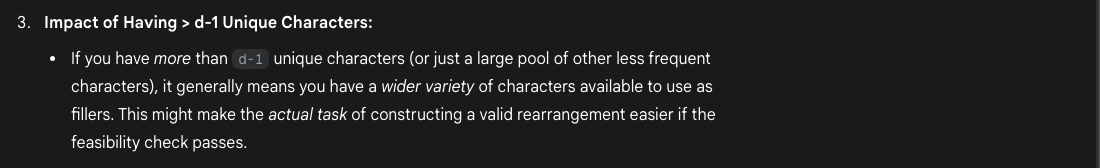

https://leetcode.com/problems/rearrange-string-k-distance-apart/description/    
premuium   
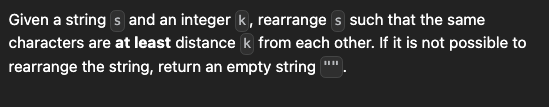    
In this problem, we have to return that string

In [ ]:
class Solution {
    public:
        string rearrangeString(string s, int d) {
                if(d==0) return s;
                unordered_map<char,int> m;
                int n=s.size();
                int maxx = 0;
                int maxCnt = 0;
    
                for(char c: s){
                    m[c]++;
                    if(m[c]>maxx){
                        maxx = m[c];
                        maxCnt = 1;
                    }
                    else if(m[c]==maxx){
                        maxCnt++;
                    }	
                }
                if(maxCnt+d*(maxx-1)>n){
                    return "";
                }
    
                int req_len=d;
                string ans;
                vector<pair<int,char>> tmp;
                for(auto p: m) tmp.push_back({p.second,p.first});
                priority_queue<pair<int,char>> pq(tmp.begin(),tmp.end());
                while(!pq.empty()){
                    vector<pair<int,char>> tmp2;
                    int curr_len=0;
                    while(curr_len!=req_len){
                        auto p=pq.top();
                        pq.pop();
                        ans+=p.second;
                        if(p.first-1>0) tmp2.push_back({p.first-1,p.second});
                        curr_len++;
                        if(pq.empty()) break;
                    }
                    for(auto pp: tmp2) pq.push(pp);  
                }
                return ans;
            }
    };

https://leetcode.com/problems/reorganize-string/description/   
 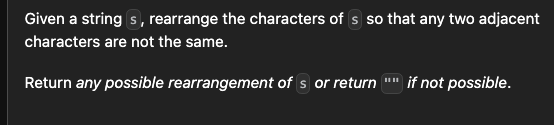

In [ ]:
class Solution {
    public:
        string reorganizeString(string s) {
                int d=2;
                unordered_map<char,int> m;
                int n=s.size();
                int maxx = 0;
                int maxCnt = 0;
    
                for(char c: s){
                    m[c]++;
                    if(m[c]>maxx){
                        maxx = m[c];
                        maxCnt = 1;
                    }
                    else if(m[c]==maxx){
                        maxCnt++;
                    }	
                }
                if(maxCnt+d*(maxx-1)>n){
                    return "";
                }
    
                int req_len=d;
                string ans;
                vector<pair<int,char>> tmp;
                for(auto p: m) tmp.push_back({p.second,p.first});
                priority_queue<pair<int,char>> pq(tmp.begin(),tmp.end());
                while(!pq.empty()){
                    vector<pair<int,char>> tmp2;
                    int curr_len=0;
                    while(curr_len!=req_len){
                        auto p=pq.top();
                        pq.pop();
                        ans+=p.second;
                        if(p.first-1>0) tmp2.push_back({p.first-1,p.second});
                        curr_len++;
                        if(pq.empty()) break;
                    }
                    for(auto pp: tmp2) pq.push(pp);  
                }
                return ans;
            }
    };

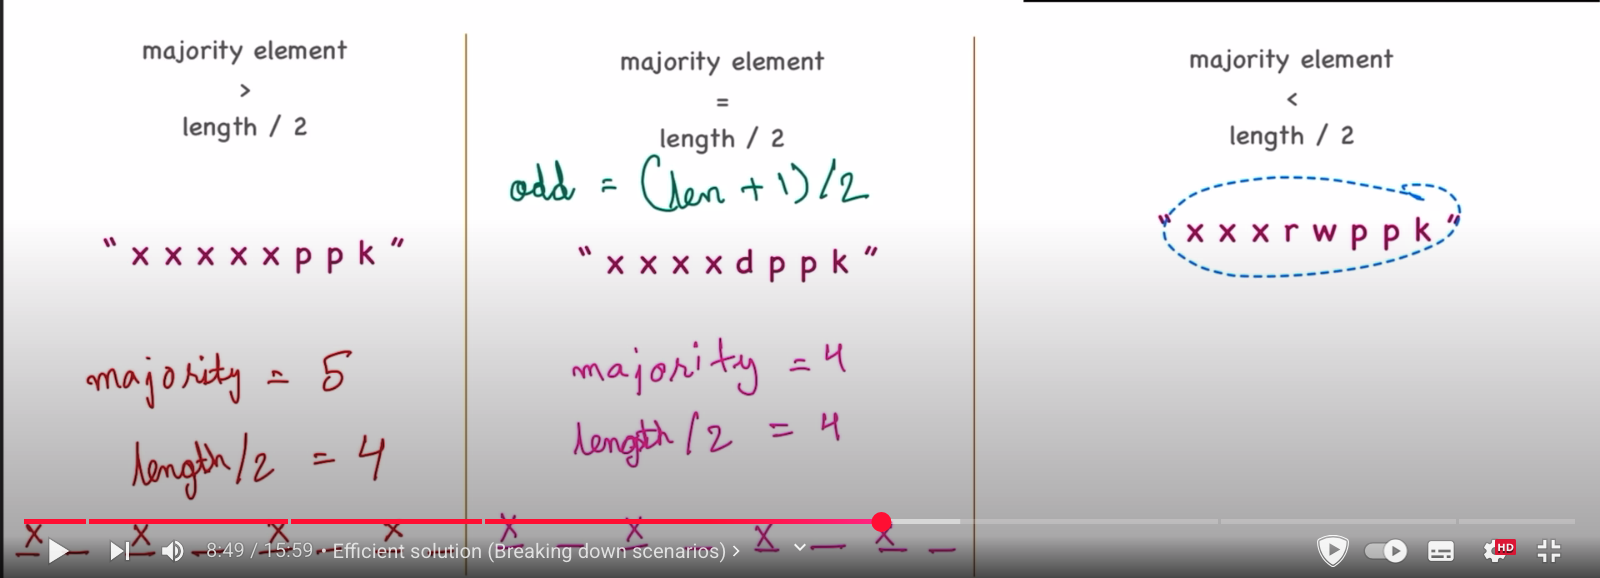

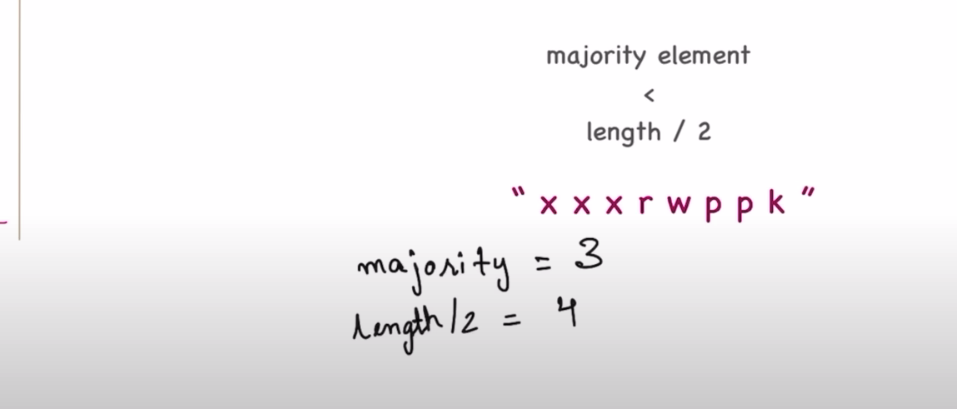

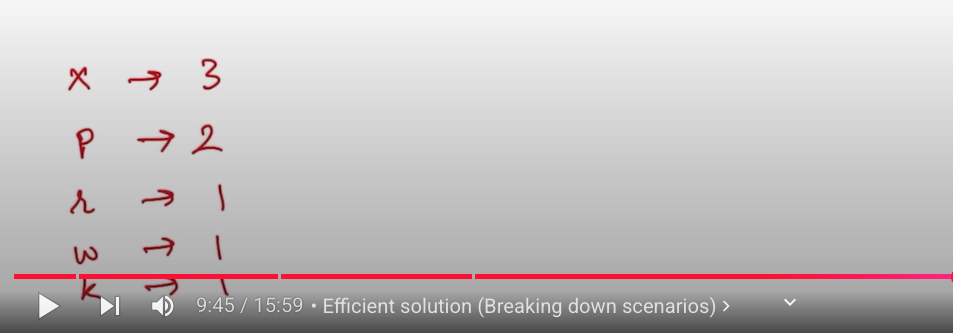

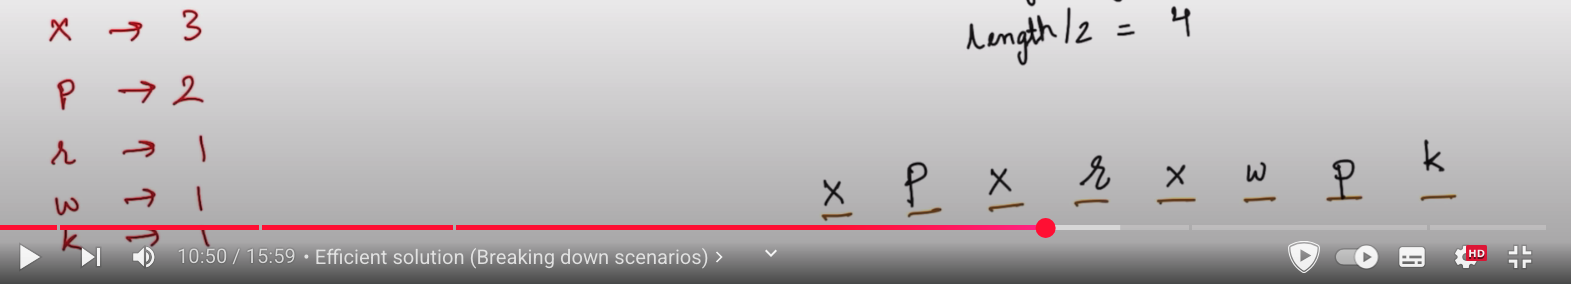

In [ ]:
class Solution {
    public:
        string reorganizeString(string s) {
                unordered_map<char,int> m;
                int n=s.size();
                int maxx = 0;
                char charMax;
                for(char c: s){
                    m[c]++;
                    if(m[c]>maxx){
                        maxx = m[c];
                        charMax=c;
                    }
                }
                if(maxx>ceil(n/2.0)){
                    return "";
                }
    
                string ans(n,'$');
    
    
                int idx=0;
                while(m[charMax]>0){
                    ans[idx]=charMax;
                    idx+=2;
                    m[charMax]--;
                }
    
                for(char c='a';c<='z';c++){
                    while(m[c]>0){
                        if(idx>=n){
                            idx=1;
                        }
                        ans[idx]=c;
                        idx+=2;
                        m[c]--;
                    }
                }
    
                return ans;
    
            }
    };

cwm

leetcode official

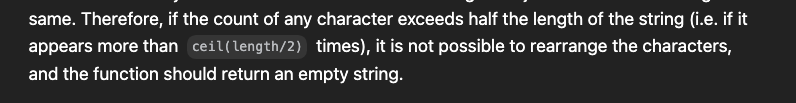

grokking

In [ ]:
class Solution {
  public:
  
  string reorganizeString(string &str) {
      unordered_map<char, int> charFrequencyMap;
      for (char chr : str) {
        charFrequencyMap[chr]++;
      }
  
      auto cmp=[](auto &x, auto &y){
        return  x.second < y.second;
      };
  
      priority_queue<pair<char, int>, vector<pair<char, int>>, decltype(cmp)> maxHeap(charFrequencyMap.begin(), charFrequencyMap.end(),cmp);
  
  
      pair<char, int> previousEntry('$', -1);
      //this all logic so that we use a pair only in present itiration
  
      string resultString = "";
      while (!maxHeap.empty()) {
        pair<char, int> currentEntry = maxHeap.top();
        maxHeap.pop();
        // add the previous entry back in the heap if its frequency is greater than zero
        if (previousEntry.second > 0) {
          maxHeap.push(previousEntry);
        }
        // append the current character to the result string and decrement its count
        resultString += currentEntry.first;
        currentEntry.second--;
        previousEntry = currentEntry;
      }
  
      // if we were successful in appending all the characters to the result string, 
      // return it
      return resultString.length() == str.length() ? resultString : "";
    }
  
  };